<a href="https://colab.research.google.com/github/AmiltonCristian/machine_learning_with_free_code_camp/blob/main/LinearRegression/Predict_Titanic_Survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installations and imports

In [110]:
from IPython.display import clear_output
!pip install tensorflow
!pip install pandas
clear_output()

In [111]:
import tensorflow as tf
import pandas as pd

#Data

**You can find the dataset used in this notebook in the follow link:**
https://data.world/jayqi/titanic

We will export the dataframe.

In [469]:
df = pd.read_csv('https://query.data.world/s/pjhcdaqxysuzq2dgwwd2mwr7ws3l4z')
df.shape

(1309, 14)

In [470]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [471]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


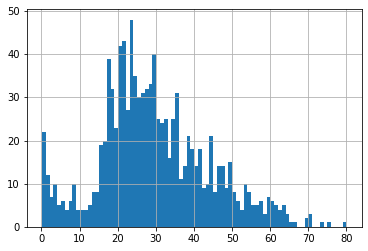

In [472]:
df.age.hist(bins=80)

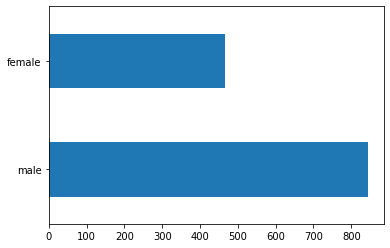

In [473]:
df.sex.value_counts().plot(kind='barh')

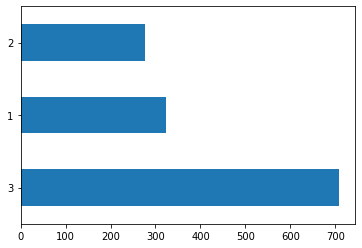

In [474]:
df.pclass.value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

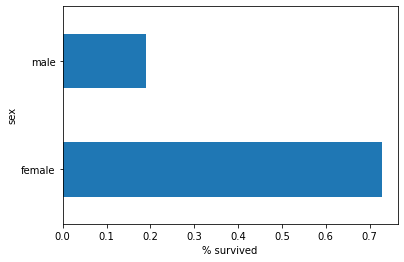

In [475]:
df.groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

How many data are missing per columns:

In [476]:
missing = df.isnull().sum()
print(missing)
#uncomment bellow line if you want see % data missing
#print(df.isnull().sum() / df.shape[0] * 100)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Replacing age missing data with the mean of ages.

In [477]:
df['age'].fillna(df['age'].median(), inplace=True)

Removing irrelevant columns, then drop rows with missing data (only 3 rows in this case) on 'fare' and 'embarked' columns.

In [478]:
df = df.drop(columns=['name', 'ticket', 'cabin', 'home.dest', 'boat', 'body'])
df = df.dropna()
df.shape

(1306, 8)

Shuffle the dataframe.

In [479]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,5.0,4,2,31.3875,S
1,2,1,female,31.0,0,0,21.0000,S
2,3,0,female,28.0,0,0,8.1375,Q
3,1,1,female,19.0,1,0,91.0792,C
4,2,0,male,37.0,1,0,26.0000,S


We will split the dataframe into two new dataframe, one to train and another to test.

Then pop the 'survived' column and store it in a new variable.

80% data will be used for train and 20% to test.


In [480]:
df_train = df.sample(frac=0.8)  # separate 80% data to train
df_eval = df.drop(df_train.index)
y_train = df_train.pop('survived') # the ramaining 20% data to test
y_eval = df_eval.pop('survived')

#Feature Columns

Creating feature columns, to be able to working with text columns.

In [481]:
CATEGORICAL_COLUMNS = ['sex', 'embarked']
NUMERIC_COLUMNS = ['pclass', 'age', 'sibsp', 'parch', 'fare']
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = df_train[feature_name].unique() # list of all unique column values
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('female', 'male'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embarked', vocabulary_list=('S', 'C', 'Q'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sibsp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#Input function
The input function will convert pandas dataframe into tf.data.Dataset

In [482]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(df_train, y_train, num_epochs=50)
eval_input_fn = make_input_fn(df_eval, y_eval, num_epochs=1, shuffle=False)



#The model
We will use a linear estimator to utilize the linear regression algorithm.

*n_classes* refers to dataframe_y distinct values.

In [483]:
model = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7pe2suf6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#Training the model

In [484]:
model.train(train_input_fn)
result = model.evaluate(eval_input_fn)

clear_output()
print(result)
print('Accuracy:', result['accuracy'])

{'accuracy': 0.8007663, 'accuracy_baseline': 0.6091954, 'auc': 0.83253175, 'auc_precision_recall': 0.81742203, 'average_loss': 0.4812325, 'label/mean': 0.3908046, 'loss': 0.4572471, 'precision': 0.7906977, 'prediction/mean': 0.34377584, 'recall': 0.6666667, 'global_step': 1650}
Accuracy: 0.8007663


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7pe2suf6/model.ckpt-1650
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


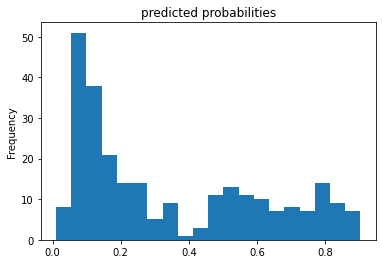

In [485]:
pred_lst = list(model.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1]for pred in pred_lst])
probs.plot(kind='hist', bins=20, title='predicted probabilities')